# LU Decomposition

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

## Implementation

The function [`scipy.linalg.lu`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html) computes the LU decomposition *with partial pivoting* which is different than the LU decomposition we consider. So let's write our own Python function called `lu` to compute the LU decomposition. The function `lu` returns $L=I$ and $U=A$ with a warning message if the LU decomposition of $A$ does not exist.

In [2]:
def lu(A):
    "Compute LU decomposition of matrix A."
    m,n = A.shape
    L = np.eye(m)
    U = A.copy()
    for j in range(0,n-1):
        for i in range(j+1,m):
            if U[j,j] == 0:
                print("LU decomposition for A does not exist.")
                return np.eye(m),A
            cij = -U[i,j]/U[j,j]
            U[i,:] = cij*U[j,:] + U[i,:]
            L[i,j] = -cij
    return L,U

Let's verify our function works:

In [3]:
A = np.array([[2.,1.,1.],[2.,0.,2.],[4.,3.,4.]])
L,U = lu(A)

In [4]:
L

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  0.],
       [ 2., -1.,  1.]])

In [5]:
U

array([[ 2.,  1.,  1.],
       [ 0., -1.,  1.],
       [ 0.,  0.,  3.]])

In [6]:
L@U

array([[2., 1., 1.],
       [2., 0., 2.],
       [4., 3., 4.]])

In [7]:
A

array([[2., 1., 1.],
       [2., 0., 2.],
       [4., 3., 4.]])

Success! Let's try an example where we know the LU decomposition does not exist:

In [8]:
A = np.array([[0.,1.],[1.,0.]])
L,U = lu(A)

LU decomposition for A does not exist.


In [9]:
L

array([[1., 0.],
       [0., 1.]])

In [10]:
U

array([[0., 1.],
       [1., 0.]])

## Example

Consider the $N$ by $N$ matrix

$$
A = 
\left[
\begin{array}{rrrrr}
2 & -1 & & & \\
-1 & 2 & -1 & & \\
& \ddots & \ddots & \ddots & \\
& & -1 & 2 & -1 \\
& & & -1 & 2 \\
\end{array}
\right]
$$

Compute the solution of the system $A \mathbf{x} = \mathbf{b}$ for

$$
\mathbf{b} = \left[ \begin{array}{r} 1 \\ \vdots \\ 1 \end{array} \right]
$$

by computing the LU decomposition and using the function `scipy.linalg.solve_triangular`.

In [11]:
N = 20
A1 = 2*np.eye(N)
A2 = np.diag(-np.ones(N-1),1)
A = A1 + A2 + A2.T

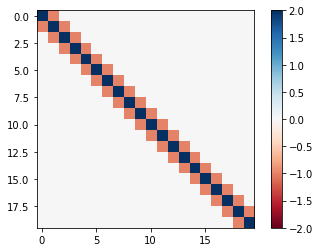

In [12]:
plt.imshow(A,cmap='RdBu'), plt.clim([-2,2])
plt.colorbar()
plt.show()

Compute the LU decomposition $A=LU$ and visualize the matrices $L$ and $U$:

In [13]:
L,U = lu(A)

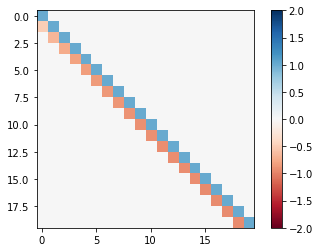

In [14]:
plt.imshow(L,cmap='RdBu'), plt.clim([-2,2]), plt.colorbar()
plt.show()

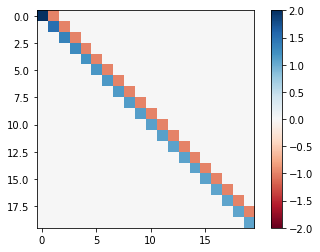

In [15]:
plt.imshow(U,cmap='RdBu'), plt.clim([-2,2]), plt.colorbar()
plt.show()

Solve the systems $L \boldsymbol{y} = \boldsymbol{b}$ and $U \boldsymbol{x} = \boldsymbol{y}$, then plot the solution $\boldsymbol{x}$:

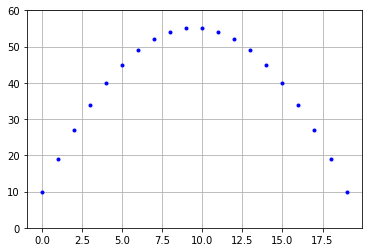

In [16]:
b = np.ones([N,1])
y = la.solve_triangular(L,b,lower=True)
x = la.solve_triangular(U,y,lower=False)
plt.plot(x,'b.'), plt.grid(True), plt.ylim([0,60])
plt.show()